# Working with Missing and Duplicate Data

Corresponds to a DataQuest session.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from pathlib import Path

In [2]:
data_path = Path.home() / "datasets" / "tabular_practice"

happiness = [
    pd.read_csv(data_path / f"wh_{year}.csv")
    for year in range(2015, 2018)
]
for df in happiness:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           164 non-null    int

We'd like to concatenate the datasets. First, we need to normalize the column names

In [3]:
for df in happiness:
    df.columns = df.columns.str.replace(".", " ").str.replace("[()]", "", regex=True).str.replace("\s+", " ", regex=True).str.strip().str.upper()
    print(df.columns)

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'STANDARD ERROR', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')
Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR'],
      dtype='object')
Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')


In [4]:
# Combine the datasets

combined = pd.concat(happiness, ignore_index=True)
combined.isnull().sum()

COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64

We still have columns in some of the yearly datasets, but not in others.

Here is a nice way to visualize the pattern of missing values.

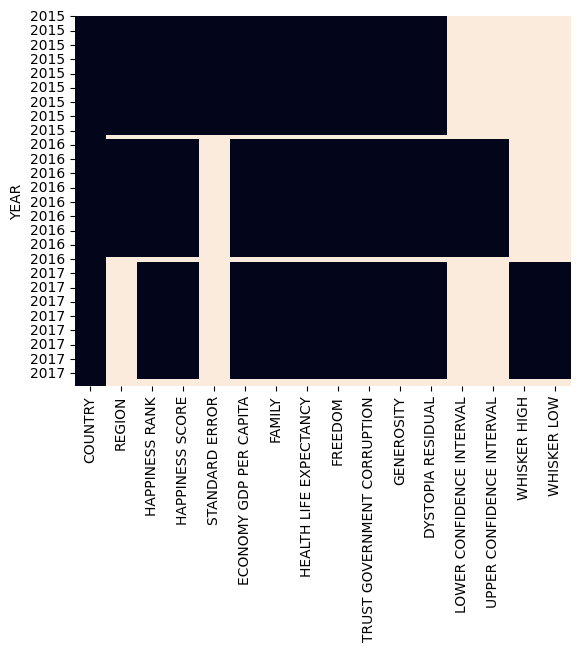

In [5]:
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

We can see:

* `REGION` is missing in 2017
* The three datasets quantify variations in the happiness score in different ways
* For 22 rows, values are missing for all columns except `COUNTRY` and `YEAR`: 11 for 2015, 2016 each

A default workflow for dealing with missing data is:

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.


In [6]:
happiness[1].head(10)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
5,Canada,North America,6.0,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,2016
6,Netherlands,Western Europe,7.0,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,2016
7,New Zealand,Australia and New Zealand,8.0,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553,2016
8,Australia,Australia and New Zealand,9.0,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,2016
9,Sweden,Western Europe,10.0,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,2016


In [7]:
happiness[2].head(10)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
5,Netherlands,6.0,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,2017
6,Canada,7.0,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,2017
7,New Zealand,8.0,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,2017
8,Sweden,9.0,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,2017
9,Australia,10.0,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,2017


We can obtain the `REGION` values from the datasets of 2015 and 2016

In [8]:
dfs_selected = [df[["COUNTRY", "REGION"]] for df in happiness[:-1]]
regions = pd.concat(dfs_selected, ignore_index=True).drop_duplicates().dropna()
regions

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
215,Belize,Latin America and Caribbean
239,Somalia,Sub-Saharan Africa
260,Somaliland Region,Sub-Saharan Africa
276,Namibia,Sub-Saharan Africa


In [9]:
df_2017_with_region = pd.merge(happiness[2], regions, on="COUNTRY", how="left")
df_2017_with_region.head(10)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR,REGION
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,Western Europe
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,Western Europe
2,Iceland,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,Western Europe
3,Switzerland,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017,Western Europe
4,Finland,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017,Western Europe
5,Netherlands,6.0,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,2017,Western Europe
6,Canada,7.0,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,2017,North America
7,New Zealand,8.0,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,2017,Australia and New Zealand
8,Sweden,9.0,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,2017,Western Europe
9,Australia,10.0,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,2017,Australia and New Zealand


In [10]:
df_2017_with_region["REGION"].value_counts(dropna=False)

REGION
Sub-Saharan Africa                 44
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

In [11]:
# Let us also fix "REGION" in the other two datasets, and then combine them again
happiness[2] = df_2017_with_region
for i in range(2):
    happiness[i].drop("REGION", axis=1, inplace=True)
    happiness[i] = pd.merge(happiness[i], regions, on="COUNTRY", how="left")
combined = pd.concat(happiness, ignore_index=True)
combined.isnull().sum()

COUNTRY                          0
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
REGION                           0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64

Next, we check for duplicates in `["COUNTRY", "YEAR"]`. We capitalize "COUNTRY" in order to detect different spellings.

In [12]:
combined["COUNTRY_UPPER"] = combined["COUNTRY"].str.upper()
sind = ["YEAR", "COUNTRY_UPPER"]
# Show all duplicate rows, do not skip the first ones:
dups = combined[sind].duplicated(keep=False)
combined[dups]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,REGION,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,COUNTRY_UPPER
90,Somaliland region,91.0,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,2015,Sub-Saharan Africa,NaN,NaN,NaN,NaN,SOMALILAND REGION
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa,NaN,NaN,NaN,NaN,SOMALILAND REGION
260,Somaliland Region,97.0,5.057,NaN,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,2016,Sub-Saharan Africa,4.934,5.18,NaN,NaN,SOMALILAND REGION
326,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa,NaN,NaN,NaN,NaN,SOMALILAND REGION
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa,NaN,NaN,NaN,NaN,SOMALILAND REGION
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa,NaN,NaN,NaN,NaN,SOMALILAND REGION


Note that for all duplicates, we want to retain the first rows, who for 2015 and 2016 have non-NaN values. This is the default behavior of `drop_duplicates` (otherwise, we'd have to reorder the rows first).

In [13]:
# We also drop the "COUNTRY_UPPER" column again
combined = combined.drop_duplicates(sind).drop("COUNTRY_UPPER", axis=1)
combined[combined["COUNTRY"].str.startswith("Somaliland")]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,REGION,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
90,Somaliland region,91.0,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,2015,Sub-Saharan Africa,NaN,NaN,NaN,NaN
260,Somaliland Region,97.0,5.057,NaN,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,2016,Sub-Saharan Africa,4.934,5.18,NaN,NaN
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa,NaN,NaN,NaN,NaN


In [14]:
combined.isnull().sum()

COUNTRY                          0
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
STANDARD ERROR                 331
ECONOMY GDP PER CAPITA          19
FAMILY                          19
HEALTH LIFE EXPECTANCY          19
FREEDOM                         19
TRUST GOVERNMENT CORRUPTION     19
GENEROSITY                      19
DYSTOPIA RESIDUAL               19
YEAR                             0
REGION                           0
LOWER CONFIDENCE INTERVAL      332
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
dtype: int64

Finally, we drop columns which only appear for one of the years.

In [15]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']
combined = combined.drop(columns_to_drop, axis=1)
combined.isnull().sum()

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION                          0
dtype: int64

In [16]:
combined[combined["HAPPINESS RANK"].isnull()]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,REGION
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Latin America and Caribbean
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Latin America and Caribbean
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
321,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
322,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
323,Lesotho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
324,Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
325,Oman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Middle East and Northern Africa


In [17]:
combined[combined["HAPPINESS RANK"].isnull()].value_counts("YEAR")

YEAR
2017    8
2016    6
2015    5
Name: count, dtype: int64

In [18]:
combined[combined["HAPPINESS RANK"].isnull()].value_counts(["REGION", "YEAR"], dropna=False)

REGION                           YEAR
Sub-Saharan Africa               2016    5
                                 2017    4
                                 2015    3
Latin America and Caribbean      2015    2
                                 2017    2
Middle East and Northern Africa  2016    1
                                 2017    1
Southeastern Asia                2017    1
Name: count, dtype: int64

The remaining missing values reside in 19 rows:

* All values in these rows are NaN
* These rows are in 4 different regions. 12 rows are in "Sub-Saharan Africa"

It is probably safe just to drop these 19 rows. Since all columns are missing, no information is removed. Let us compute the fraction of missing value rows for the 4 regions concerned.

In [19]:
regions = ["Sub-Saharan Africa", "Latin America and Caribbean", "Middle East and Northern Africa", "Southeastern Asia"]
regex = "|".join(regions)
selected = combined[combined["REGION"].str.contains(regex)]
null_df = selected["HAPPINESS RANK"].isnull().groupby(selected["REGION"]).sum().astype(int)
all_df = selected.value_counts("REGION")
100 * null_df / all_df

REGION
Latin America and Caribbean        5.555556
Middle East and Northern Africa    3.333333
Southeastern Asia                  3.703704
Sub-Saharan Africa                 9.302326
dtype: float64

For "Sub-Saharan Africa", the fraction of missing rows (to be dropped) is more than 9%. This should be mentioned when presenting results based on removing these rows.

An alternative to dropping missing values is to impute them by, for example by the means over recorded values. Does this make sense in our case?

In [20]:
combined.pivot_table(index='REGION', values='HAPPINESS SCORE', margins=True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


The overall mean of "HAPPINESS SCORE" is 5.37, whereas the mean over "Sub-Saharan Africa" is just 4.15 -- a lot lower. Naive mean imputation does not seem to be a good idea.

In [21]:
combined = combined.dropna()
combined.isnull().sum()

COUNTRY                        0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
HEALTH LIFE EXPECTANCY         0
FREEDOM                        0
TRUST GOVERNMENT CORRUPTION    0
GENEROSITY                     0
DYSTOPIA RESIDUAL              0
YEAR                           0
REGION                         0
dtype: int64

In [22]:
combined

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,REGION
0,Switzerland,1.0,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015,Western Europe
1,Iceland,2.0,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015,Western Europe
2,Denmark,3.0,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015,Western Europe
3,Norway,4.0,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015,Western Europe
4,Canada,5.0,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
478,Rwanda,151.0,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017,Sub-Saharan Africa
479,Syria,152.0,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017,Middle East and Northern Africa
480,Tanzania,153.0,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017,Sub-Saharan Africa
481,Burundi,154.0,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017,Sub-Saharan Africa
